In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
bank = pd.read_csv('../Data/bank1/bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [11]:
# this encoder defined in the next cells.
encoder = numericEncoder()
encoded_data = encoder.fit_transform(bank)
encoded_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41.0,0.0,1.0,1.0,0.0,2288.0,1.0,0.0,2.0,4.0,8.0,1021.0,0.0,0.0,0.0,3.0,1.0
1,38.0,0.0,1.0,1.0,0.0,469.0,0.0,0.0,2.0,4.0,8.0,1283.0,0.0,0.0,0.0,3.0,1.0
2,23.0,9.0,1.0,1.0,0.0,1618.0,1.0,0.0,2.0,4.0,8.0,1246.0,0.0,0.0,0.0,3.0,1.0
3,37.0,7.0,1.0,1.0,0.0,2356.0,1.0,0.0,2.0,4.0,8.0,577.0,0.0,0.0,0.0,3.0,1.0
4,36.0,0.0,1.0,2.0,0.0,608.0,0.0,0.0,2.0,4.0,8.0,671.0,1.0,0.0,0.0,3.0,1.0
5,24.0,4.0,2.0,2.0,0.0,424.0,1.0,1.0,2.0,4.0,8.0,560.0,1.0,0.0,0.0,3.0,1.0
6,38.0,4.0,1.0,2.0,0.0,1241.0,1.0,1.0,2.0,5.0,8.0,1140.0,0.0,0.0,0.0,3.0,1.0
7,42.0,5.0,0.0,1.0,0.0,968.0,1.0,0.0,2.0,5.0,8.0,1009.0,0.0,0.0,0.0,3.0,1.0
8,19.0,9.0,1.0,1.0,0.0,425.0,1.0,0.0,2.0,5.0,8.0,606.0,0.0,0.0,0.0,3.0,1.0
9,10.0,7.0,2.0,1.0,0.0,3202.0,1.0,0.0,2.0,5.0,8.0,1197.0,2.0,0.0,0.0,3.0,1.0


### Data Visualize:

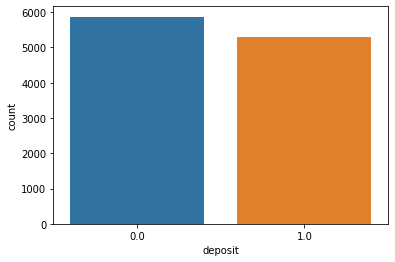

In [12]:
sns.countplot(x='deposit',data=encoded_data)

In [13]:
def min_max_values(column):
    return min(column.values), max(column.values), len(column.unique())

In [14]:
bank.apply(min_max_values,axis=0)

age                    (18, 95, 76)
job           (admin., unknown, 12)
marital       (divorced, single, 3)
education     (primary, unknown, 4)
default                (no, yes, 2)
balance        (-6847, 81204, 3805)
housing                (no, yes, 2)
loan                   (no, yes, 2)
contact      (cellular, unknown, 3)
day                     (1, 31, 31)
month                (apr, sep, 12)
duration            (2, 3881, 1428)
campaign                (1, 63, 36)
pdays                (-1, 854, 472)
previous                (0, 58, 34)
poutcome      (failure, unknown, 4)
deposit                (no, yes, 2)
dtype: object

In [60]:
def plot_features(column,axes,co):
    try:
        sns.boxenplot(column,ax=axes[co['x'],co['y']],color='red')
        if co['y']>= 4:
            co['x']+=1
            co['y']=0
        else:
            co['y']+=1
    except Exception as ex:
        
        print(column.name,":",ex)       

age          None
job          None
marital      None
education    None
default      None
balance      None
housing      None
loan         None
contact      None
day          None
month        None
duration     None
campaign     None
pdays        None
previous     None
poutcome     None
deposit      None
dtype: object

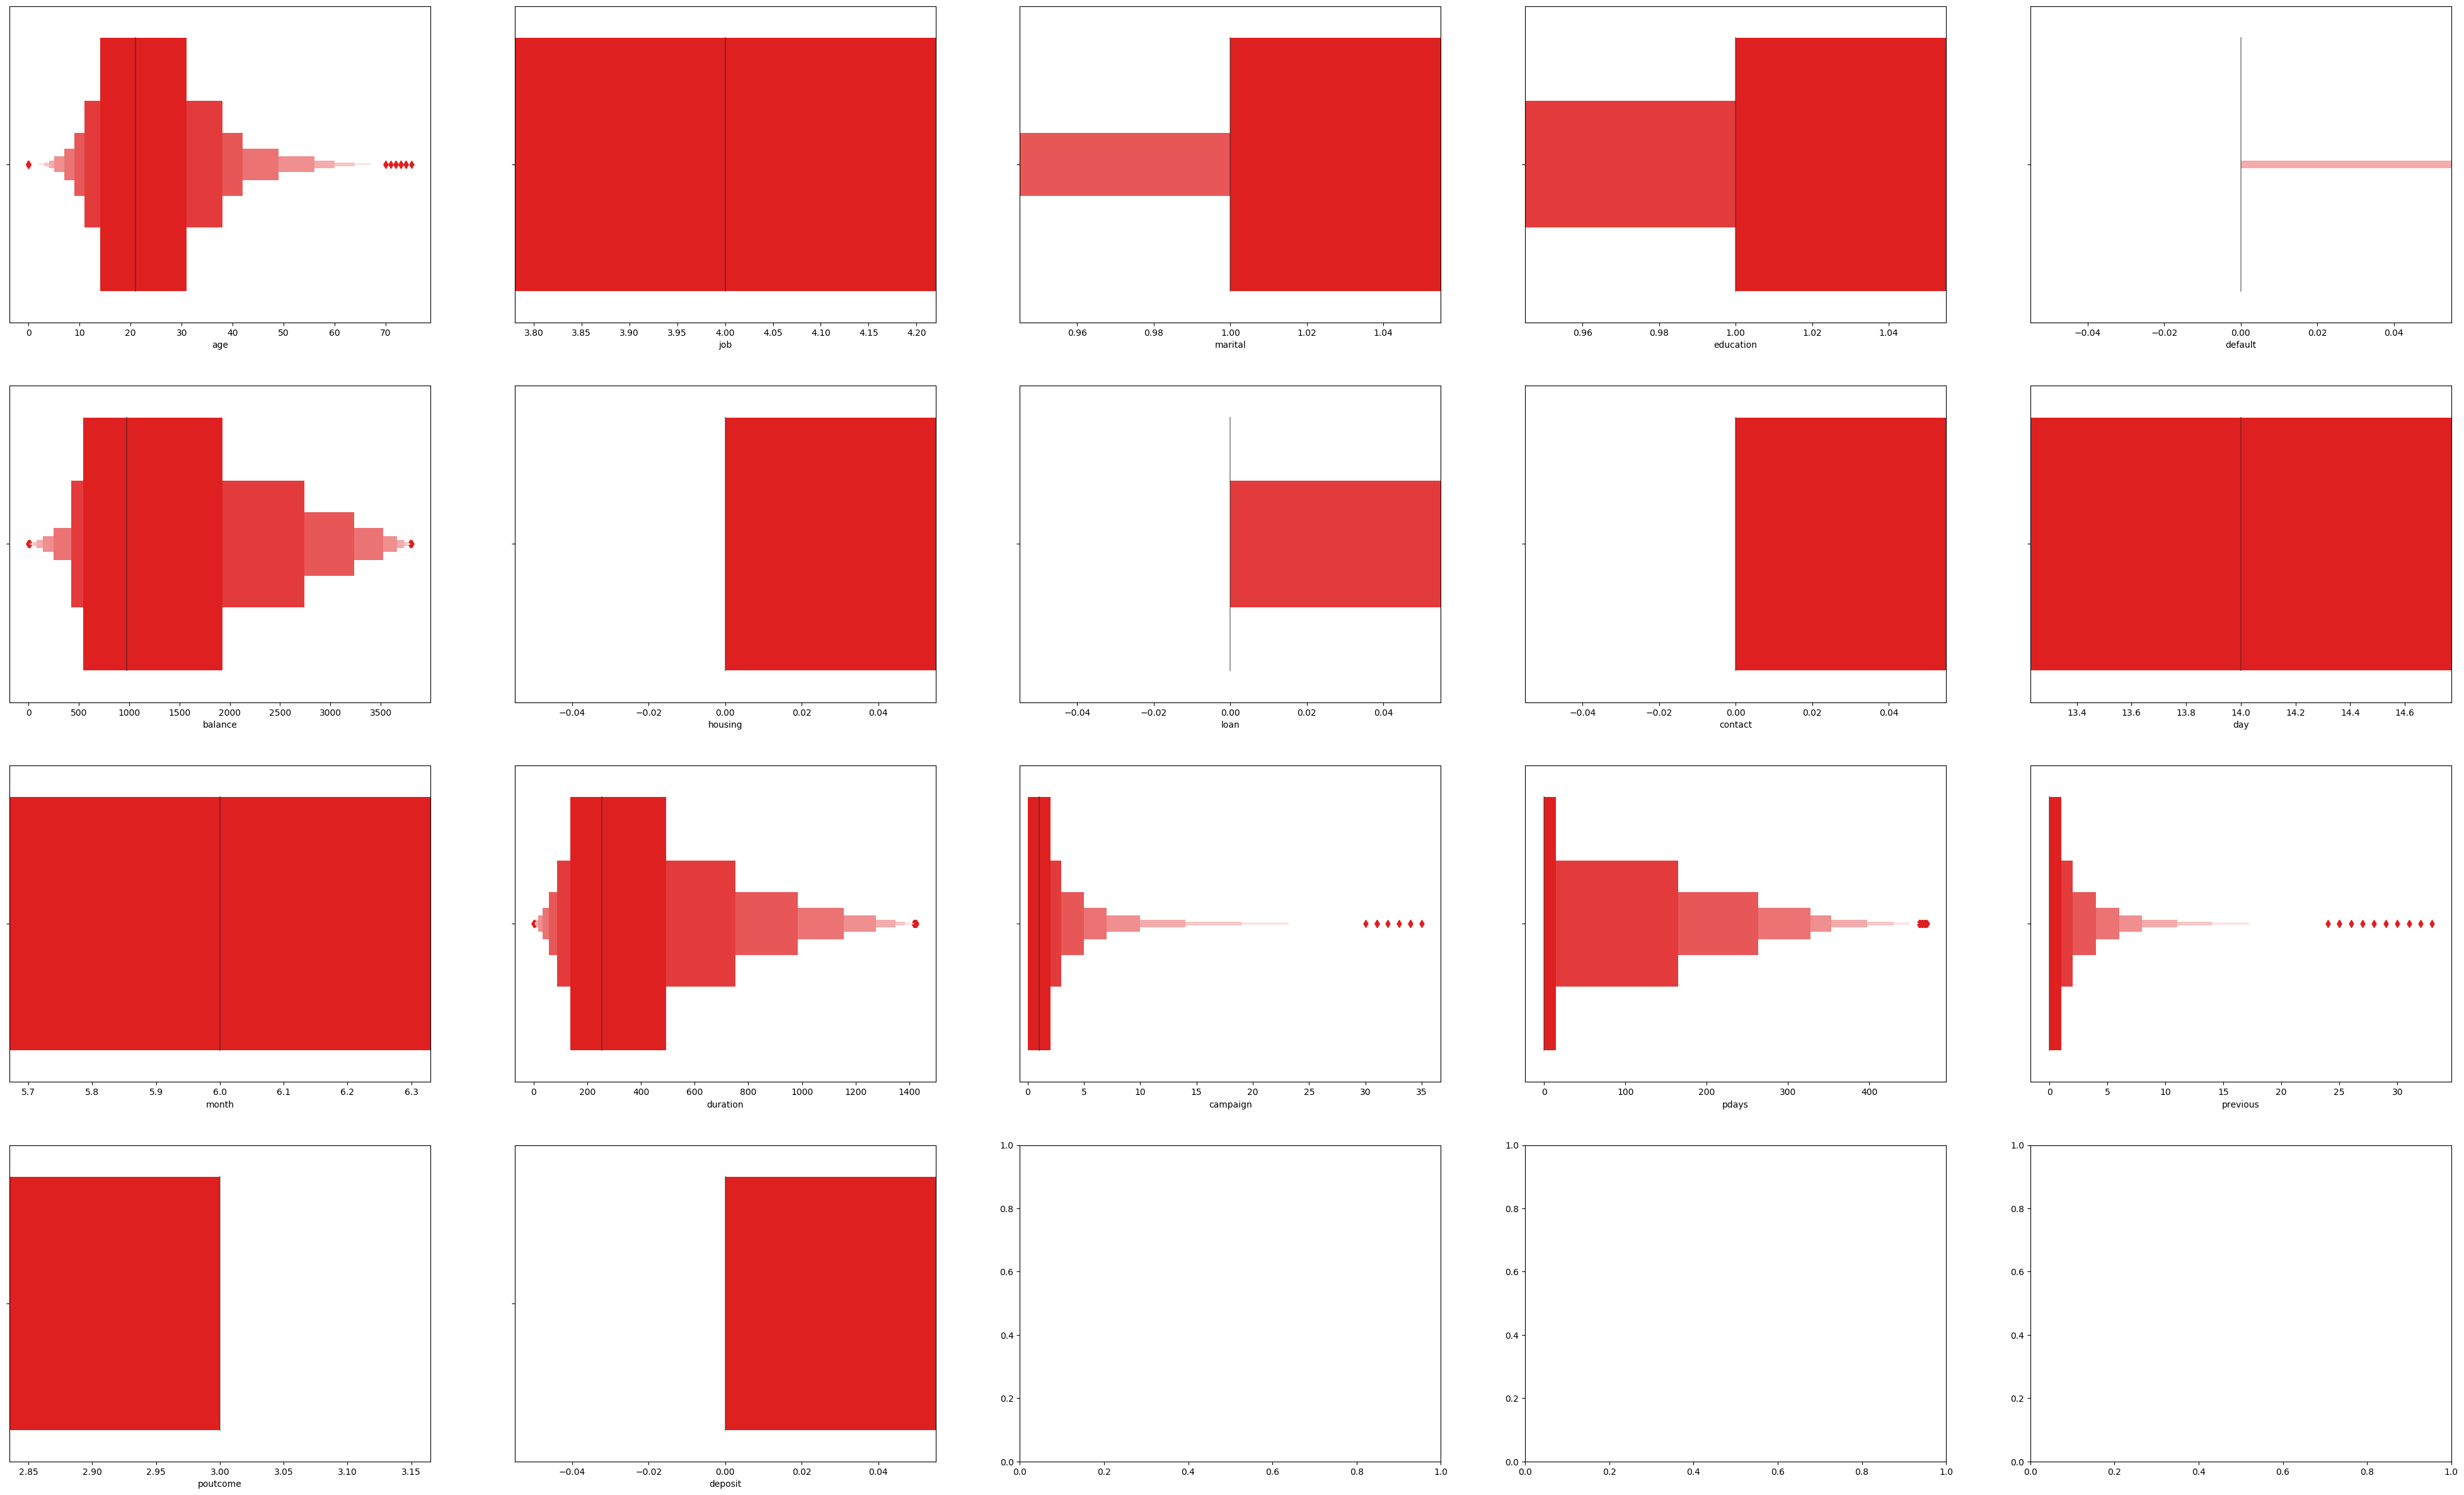

In [61]:
from collections import Counter
fig, axes = plt.subplots(4, 5, figsize=(50, 30))
co = Counter()

encoded_data.apply(plot_features,axis=0,axes=axes,co=co)

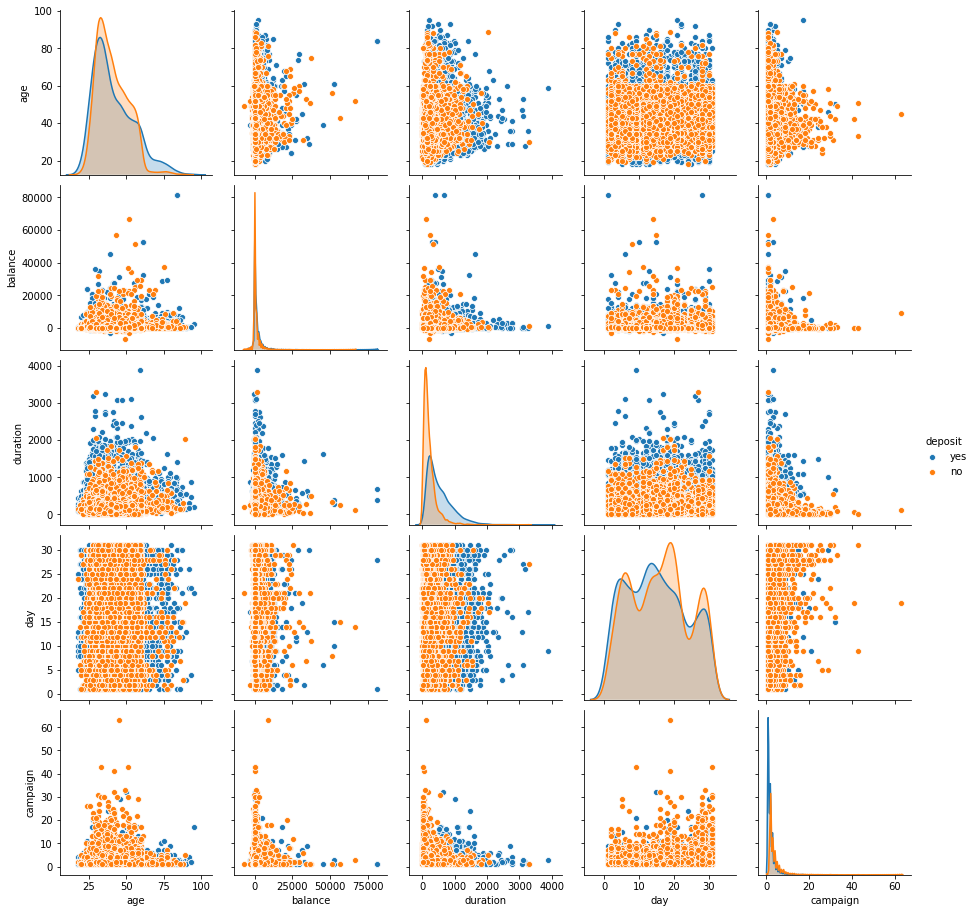

In [15]:
sns.pairplot(bank[['age','balance','duration','day','campaign','poutcome', 'deposit']], hue='deposit')

#### get categorical attributes:

In [16]:
bank_cat = bank.select_dtypes(include='O')
bank_cat.head(10)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
5,management,single,tertiary,no,yes,yes,unknown,may,unknown,yes
6,management,married,tertiary,no,yes,yes,unknown,may,unknown,yes
7,retired,divorced,secondary,no,yes,no,unknown,may,unknown,yes
8,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
9,services,single,secondary,no,yes,no,unknown,may,unknown,yes


#### plotting counts:

In [14]:
pos =1
plt.figure(figsize=(100,100))

for i in bank_cat.columns:
    sns.set(font_scale = 5)
    plt.subplot(5,2,pos)
    sns.countplot(bank[i])
    plt.title(i,fontweight="bold",fontsize=50) 
    pos +=1
    plt.tight_layout()

In [17]:
# bank["duration"].plot(kind ='kde')

In [16]:
# unknown: education, contact, jop, poutcome.

([<matplotlib.patches.Wedge at 0x1ffc5351488>,
 [Text(0.9904561305301007, 0.8725804567461618, 'admin.'),
  Text(-0.5391766919351408, 1.2048603632263277, 'technician'),
  Text(-1.3146832156672692, 0.11835557630618394, 'services'),
  Text(-0.9208194431308994, -0.9457756357361404, 'management'),
  Text(-0.17999597552060848, -1.3076702370232278, 'retired'),
  Text(0.6103202998882116, -1.7146163219637107, 'blue-collar'),
  Text(1.1372099442398567, -1.420969226521807, 'unemployed'),
  Text(1.025934008179731, -0.8305777572631425, 'entrepreneur'),
  Text(1.171592080328106, -0.6080888070935536, 'housemaid'),
  Text(2.2257894517383776, -0.6544167758624259, 'unknown'),
  Text(1.3110490616599673, -0.15346125869586555, 'self-employed'),
  Text(2.3195497497888335, -0.045705122848095955, 'student')],
 [Text(0.540248798470964, 0.4759529764069973, '22.99'),
  Text(-0.29409637741916766, 0.6571965617598151, '17.42'),
  Text(-0.7170999358185104, 0.06455758707610032, '16.33'),
  Text(-0.5022651507986724, -

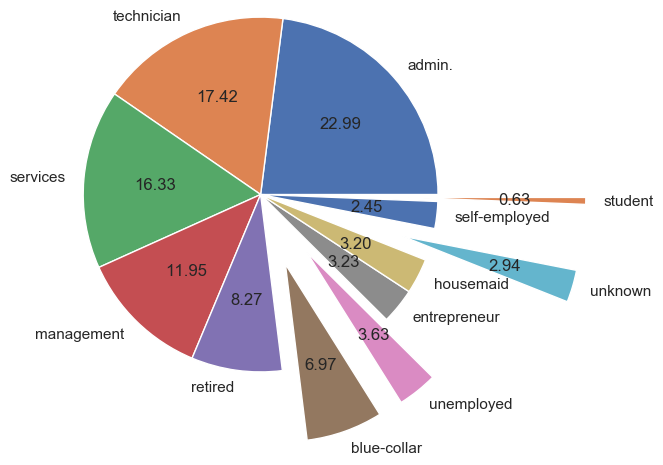

In [17]:
plt.rcdefaults()
sns.set(font_scale = 1)
plt.pie(bank['job'].value_counts(),autopct='%.2f',radius=1.2,explode=[0,0,0,0,0,0.5,0.5,0,0,1,0,1],
        shadow=False,labels=bank['job'].unique().tolist())

([<matplotlib.patches.Wedge at 0x1ffc551b7c8>,
 [Text(0.03900391781306229, 1.319423622039272, 'secondary'),
  Text(-0.7361690707623763, -1.0956528187582324, 'tertiary'),
  Text(1.0079341524642111, -0.852331358273443, 'primary'),
  Text(1.3071066984061916, -0.18404368769850601, 'unknown')],
 [Text(0.02127486426167034, 0.7196856120214211, '49.06'),
  Text(-0.401546765870387, -0.5976288102317631, '33.05'),
  Text(0.5497822649804788, -0.46490801360369616, '13.44'),
  Text(0.7129672900397409, -0.10038746601736691, '4.45')])

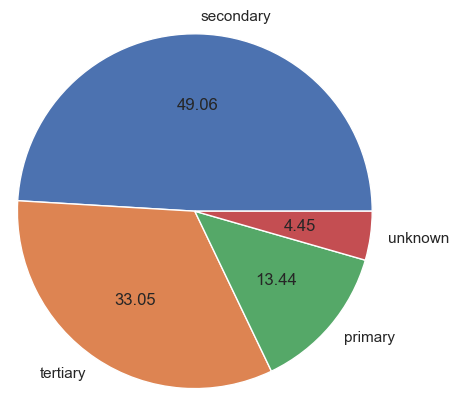

In [18]:
plt.rcdefaults()
sns.set(font_scale = 1)
plt.pie(bank['education'].value_counts(),autopct='%.2f',radius=1.2,explode=[0,0,0,0],
        shadow=False,labels=bank['education'].unique().tolist())

([<matplotlib.patches.Wedge at 0x1ffc53f9388>,
 [Text(-0.7024442298096565, 0.8465058204212885, 'unknown'),
  Text(0.5028897460304652, -0.9783158504989145, 'cellular'),
  Text(1.0740018800985787, -0.23773927219691363, 'telephone')],
 [Text(-0.3831513980779944, 0.4617304475025209, '72.05'),
  Text(0.2743034978347992, -0.5336268275448623, '21.02'),
  Text(0.5858192073264974, -0.12967596665286196, '6.93')])

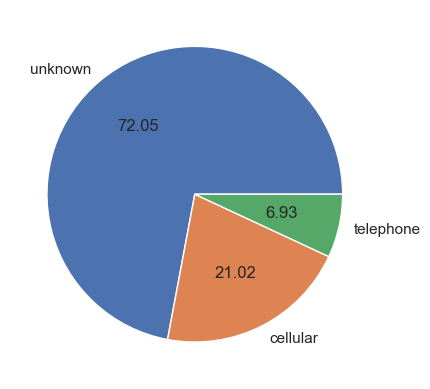

In [19]:
plt.rcdefaults()
sns.set(font_scale = 1)
plt.pie(bank['contact'].value_counts(),autopct='%.2f',radius=1.0,explode=[0,0,0],
        shadow=False,labels=bank['contact'].unique().tolist())

([<matplotlib.patches.Wedge at 0x1ffc544b408>,
 [Text(0.924539040352595, 0.9421398849766965, 'may'),
  Text(-0.5698556718307689, 1.1906571770590824, 'jun'),
  Text(-1.2719099397128177, 0.3530511368905872, 'jul'),
  Text(-1.1588518332229283, -0.6320304016705672, 'aug'),
  Text(-0.5885508531144389, -1.1815277793172136, 'oct'),
  Text(0.0831650905424808, -1.3173775342380258, 'nov'),
  Text(0.6800588498371353, -1.1313354766638377, 'dec'),
  Text(1.0088929414153798, -0.8511962363416694, 'jan'),
  Text(1.162391039809802, -0.6254974584839552, 'feb'),
  Text(1.2582560511992928, -0.3989883577504022, 'mar'),
  Text(1.3071584206213518, -0.18367597392880083, 'apr'),
  Text(1.3193674217871187, -0.040860816521594734, 'sep')],
 [Text(0.5042940220105063, 0.5138944827145617, '25.3'),
  Text(-0.31083036645314666, 0.649449369304954, '13.6'),
  Text(-0.6937690580251733, 0.19257334739486573, '13.6'),
  Text(-0.6321009999397791, -0.344743855456673, '10.9'),
  Text(-0.3210277380624212, -0.6444696978093892, '

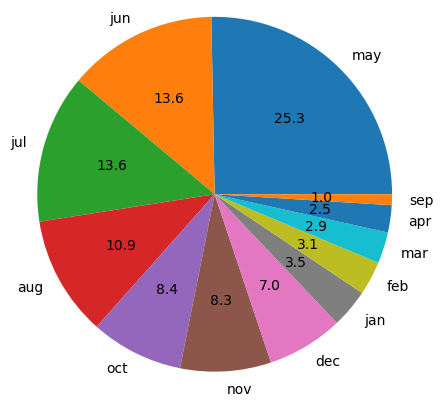

In [20]:
plt.rcdefaults()
plt.pie(bank['month'].value_counts(),labels=bank['month'].unique().tolist(),autopct='%.1f',radius=1.2,)

###  Data Preprocess:
* Splitting
* Feature Selection Transformer
* 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re

def split_data(data,y_label,test_size=0.2):
    bo = booleanEncoder() 
    
    X = data.loc[:,~data.columns.isin([y_label])]
    y = data.loc[:,y_label]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    y_train = bo.fit_transform(y_train)
    y_test = bo.fit_transform(y_test)
    return X_train, X_test,y_train,y_test

def get_metrices(model,X_test,y_test):
    y_predict= model.predict(X_test)
    return accuracy_score(y_test, y_predict),precision_score(y_test, y_predict),recall_score(y_test, y_predict),f1_score(y_test, y_predict)



def print_results(accuracy,precision,recall,f1):
    print('Accuracy: {:.2f}'.format(accuracy))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))
    print('F1: {:.2f}'.format(f1))


In [7]:
# import numpy as np
# bins = {
#     'age' : [0,18,30,40,55,np.inf],
#     'balance' :  [0,500,2000,2800,3700,np.inf]
# }
# bank[['age','balance']]=bank[['age','balance']].apply(descritize_column,bins=bins) 
# ui = unknownImputer(nan_column='job',related_column='education')
# bank

In [18]:
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.preprocessing import LabelEncoder

class unknownImputer(BaseEstimator,TransformerMixin):
    def __init__(self,unknown_value ='unknown',nan_column=None,related_column=None):
        if nan_column== None or related_column == None:
            print('Must Specify Columns!')
            raise Error()
        self.nan_column = nan_column
        self.related_column = related_column
        self.unknown_value = unknown_value
        
    def fit(self,X,y=None):
        X = pd.DataFrame(X)
        self.most_frequent = X.groupby(self.related_column)[self.nan_column].agg(pd.Series.mode)
        return self
    def transform(self,X,y=None):
        X = pd.DataFrame(X)
        transformed_X = X.copy()
        transformed_X[self.nan_column] = X[[self.nan_column,self.related_column]].apply(
        lambda x: self.most_frequent[x[self.related_column]] if x[self.nan_column] == self.unknown_value else x[self.nan_column] ,axis = 1)
        return transformed_X
        
class featureSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attributes):
        self.features = attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.features]
    
class booleanEncoder(BaseEstimator,TransformerMixin):
    def __init__(self,true_values=['true','yes']):
        self.true_values = r'|' .join(true_values)
    def fit(self,X,y=None):          
        return self
    def transform(self,X):
        X = pd.DataFrame(X)
        transformed_X = pd.DataFrame()
        transformed_X= X.apply(lambda x: x.str.lower().str.match(self.true_values).astype(int),axis=0)
        return transformed_X
    
class numericEncoder(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.encoders = {}
    def fit(self,X,y=None):
        for col in X.columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self
    def transform(self,X):
        X = pd.DataFrame(X)
        transformed_X = pd.DataFrame() 
        transformed_X= X.apply(lambda x: self.encoders[x.name].transform(x).astype(float),axis=0)
        return transformed_X

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import FeatureUnion

numeric_preprocess = Pipeline([('fields',featureSelector(['duration','campaign','pdays','previous','age','balance'])),
                               ("polynomial_features", PolynomialFeatures(degree=3)),
                               ('scaler',StandardScaler())
                              ])

cat_preprocess = Pipeline([('fields',featureSelector(['job','marital','education','contact','poutcome','month'])),
                           ('encoder', OneHotEncoder(sparse=False)),])
# 'default',
boolean_preprocess = Pipeline([('fields',featureSelector(['housing','loan'])),
                               ('encoder',booleanEncoder())])

preprocess_features = FeatureUnion(transformer_list = [
    ('num',numeric_preprocess),
    ('cat',cat_preprocess),
    ('bool',boolean_preprocess)
])

In [57]:
X_train,X_test,y_train,y_test = split_data(bank,'deposit')

In [58]:
X_train = preprocess_features.fit_transform(X_train)
X_test = preprocess_features.transform(X_test)

In [122]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC , LinearSVC

from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


select_from_model = SelectFromModel(
   RandomForestClassifier())

model_pipline = Pipeline([
 ("feature_selection", SelectPercentile()),
#     kernel='poly'
#  ('classifier',    SVC(C=10,gamma=0.01))
 ])

param_grid = [{
   "feature_selection__percentile": [50,60,80],
#     "classifier__gamma":[0.001,0.005,0.01],
#     "classifier__kernel":['rbf','linear'],
 }]

grid_search = GridSearchCV(model_pipline, param_grid, cv=3)
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_
acc,pre,rec,f1 = get_metrices(model,X_test,y_test)
print_results(acc,pre,rec,f1)

Accuracy: 0.81
Precision: 0.80
Recall: 0.81
F1: 0.80


In [116]:
model

Pipeline(steps=[('classifier', SVC(C=1, gamma=0.01))])

In [64]:
results = pd.read_csv('results.csv')
results.tail(20)

,Model,Saler,Features,Feature Selection,Accurecy on Test,Recall,Precession,Parameters,Polynomial Features
31,SVC,StandardScaler,estimator=DecisionTreeClassifier(max_depth=25),SelectFromModel,0.827138,0.859419,0.795317,"C=10,kernel='poly'",degree=3
32,SVC,StandardScaler,-,-,0.833856,0.838800,0.818099,"C=10,coef0=1,degree=2,kernel='poly'",degree=3
33,LogisticRegression,StandardScaler,-,-,0.814599,0.809747,0.803721,C=10,degree=3
34,SVC,StandardScaler,-,-,0.706673,0.912840,0.634115,"C=10,gamma=1",degree=3
35,SVC,StandardScaler,-,-,0.834304,0.852858,0.810329,"C=10,gamma=0.01",degree=3
36,SVC,StandardScaler,estimator=DecisionTreeClassifier(max_depth=25),SelectFromModel,0.830721,0.837863,0.813467,"C=100,gamma=0.01",degree=3
37,SVC,StandardScaler,estimator=DecisionTreeClassifier(max_depth=25),SelectFromModel,0.830721,0.837863,0.813467,"C=100,gamma=0.01",degree=3
38,SVC,StandardScaler,estimator=DecisionTreeClassifier(max_depth=20),SelectFromModel,0.805643,0.809747,0.789041,"C=100,gamma=0.01",-
39,SVC,StandardScaler,-,-,0.818630,0.822868,0.802559,"C=100,gamma=0.001",degree=4
40,SVC,StandardScaler,-,-,0.823556,0.832240,0.805077,"C=10,gamma=0.01",-
